In [2]:
from pyrosm import OSM, get_data
import osmnx as ox

In [3]:
fp = get_data("London")
print(fp)

Downloaded Protobuf data 'London.osm.pbf' (73.92 MB) to:
'/var/folders/b6/h942qzzd5f721pfd0b3d411m0000gn/T/pyrosm/London.osm.pbf'
/var/folders/b6/h942qzzd5f721pfd0b3d411m0000gn/T/pyrosm/London.osm.pbf


In [5]:
osm = OSM(fp)

In [197]:
buildings = osm.get_buildings()

In [80]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [198]:
buildings = buildings.to_crs('epsg:27700')
buildings = buildings[buildings.geometry.type=='Polygon']

In [221]:
named = buildings[~buildings.name.isnull()]
noned = buildings[buildings.name.isnull()]

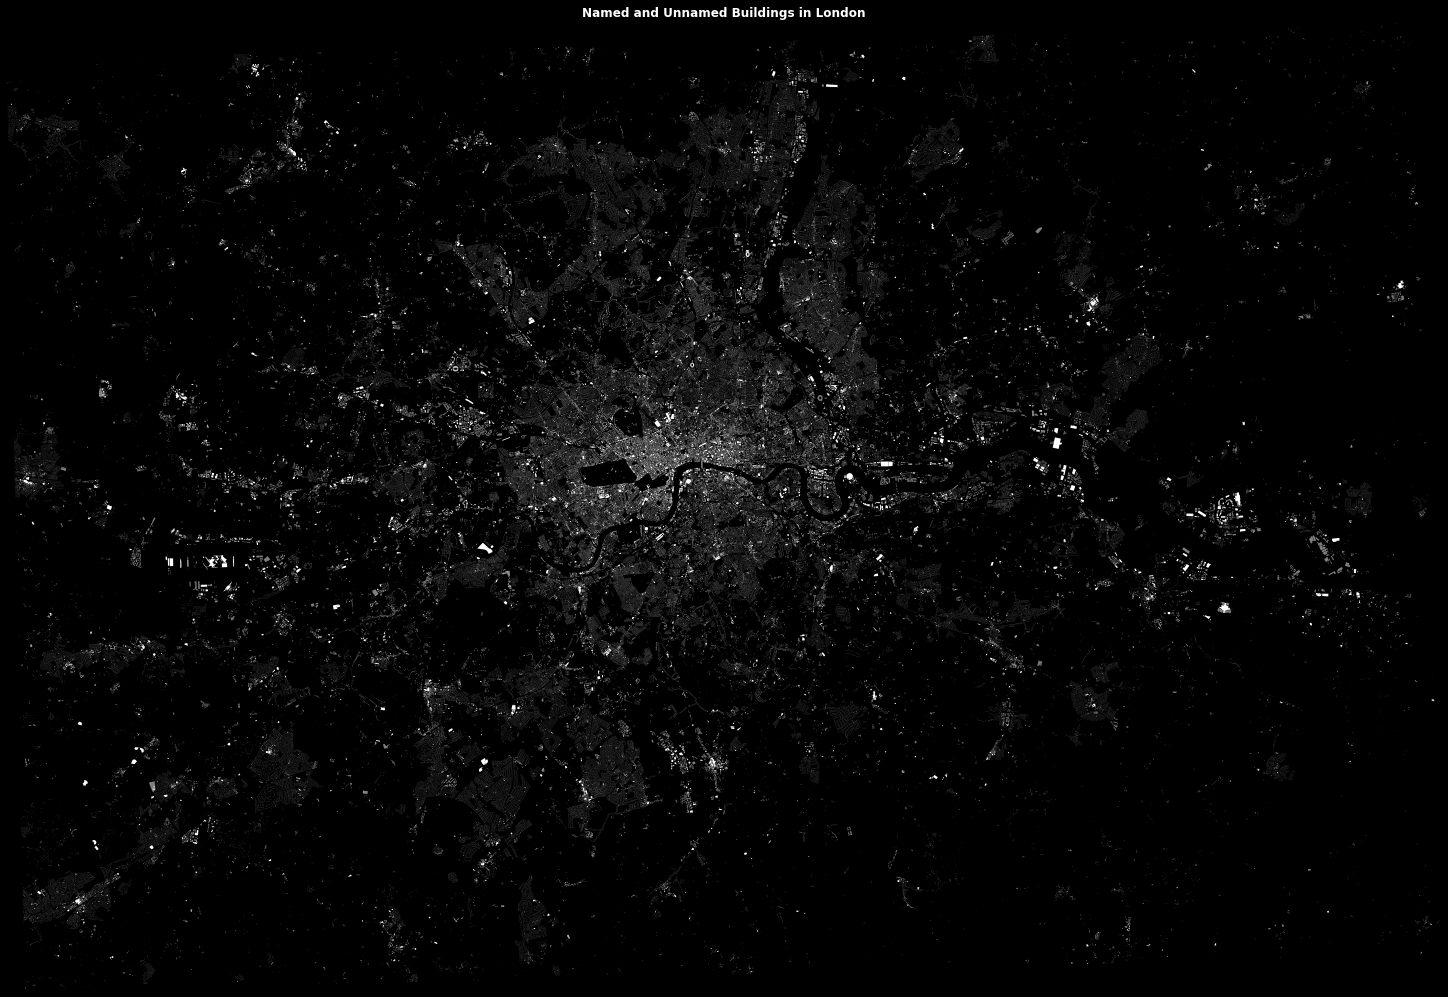

In [229]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(20, 20), 
                       facecolor='k',
                       constrained_layout=True, 
                       subplot_kw=dict(aspect='equal'))

noned.plot(ax=ax, color='w', alpha=0.5)
named.plot(ax=ax, color='w', alpha=1.0)
    
ax.set_title("Named and Unnamed Buildings in London", color='w', weight='bold')

ax.margins(0)
ax.axis('off')
    
fig.savefig('urban-morphology-london-names.png', facecolor=fig.get_facecolor(), dpi=300, bbox_inches='tight')

In [230]:
import random

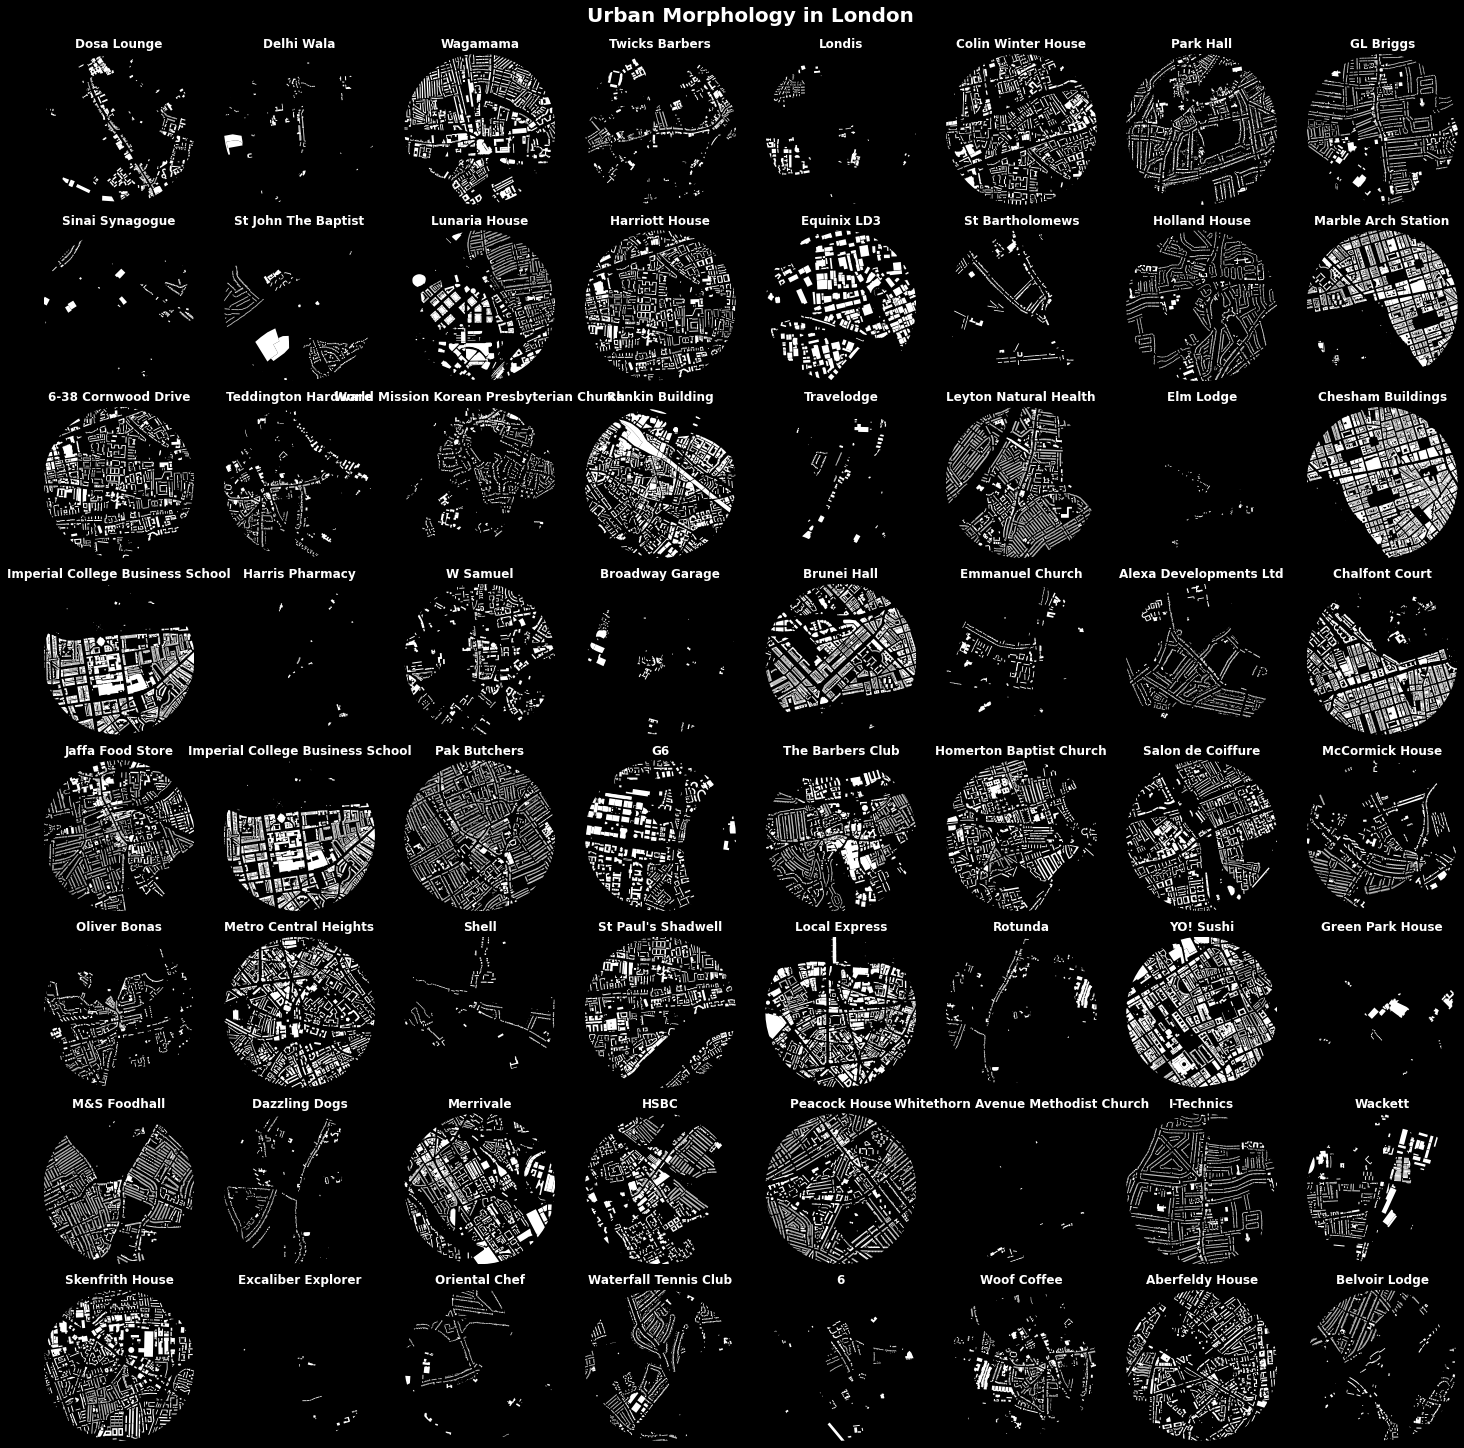

In [231]:
fig, axs = plt.subplots(8, 8, figsize=(20, 20), 
                        facecolor='k',
                        constrained_layout=True, 
                        subplot_kw=dict(aspect='equal'))

axs = axs.ravel()

for i in np.arange(0, 64):
    
    building = named.iloc[random.randint(0, named.shape[0])]
    centroid = building.geometry.centroid
    
    street = building['addr:street']
    number = building['addr:housenumber']
    name = building['name']
    
    buffer = gpd.GeoSeries(centroid.buffer(800), crs='epsg:27700')
    bounds = buffer.bounds.iloc[0]
    
    subset = gpd.overlay(gpd.GeoDataFrame(buildings.geometry), 
                         gpd.GeoDataFrame(geometry=gpd.GeoSeries(centroid.buffer(800), crs='epsg:27700')), 
                         how='intersection')
    
    subset.plot(ax=axs[i], color='w')
    
    west, south, east, north = bounds
    axs[i].set_ylim((south, north))
    axs[i].set_xlim((west, east))
    axs[i].set_title(f"{name}", color='w', weight='bold')

    axs[i].margins(0)
    axs[i].axis('off')
    
fig.suptitle('Urban Morphology in London', color='w', size=20, weight='bold')
fig.savefig('urban-morphology-london.png', facecolor=fig.get_facecolor(), dpi=300, bbox_inches='tight')